In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [23]:
cifar10 = tf.keras.datasets.cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #carregamento base de dados

x_train, x_test = x_train / 255.0, x_test / 255.0 #normaliznado em 0 até 1
y_train, y_test = y_train.flatten(), y_test.flatten() #deixando em um vetor

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [8]:
K = len(set(y_train))
K

10

In [2]:
i = Input(shape=x_train[0].shape) #camada de entrada com forma de 32x32x3

x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) #primeira convolução
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) #segunda
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) #terceira

x = Flatten()(x) #deixando em apenas um vetor para a camada densa
 
x = Dropout(0.2)(x) #dropout para evitar overffiting
x = Dense(1024, activation='relu')(x) #camadad densa
x = Dropout(0.2)(x) #denovo, evitando overfitting

x = Dense(K, activation='softmax')(x) #camada de saída

model = Model(i, x)


NameError: name 'Input' is not defined

In [25]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3748 - loss: 1.7038 - val_accuracy: 0.5447 - val_loss: 1.2751
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5693 - loss: 1.1938 - val_accuracy: 0.6090 - val_loss: 1.0998
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6379 - loss: 1.0258 - val_accuracy: 0.6618 - val_loss: 0.9620
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6932 - loss: 0.8735 - val_accuracy: 0.6638 - val_loss: 0.9418
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7348 - loss: 0.7489 - val_accuracy: 0.6873 - val_loss: 0.8895


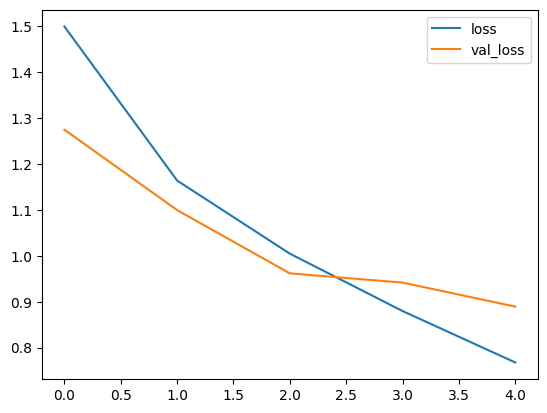

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

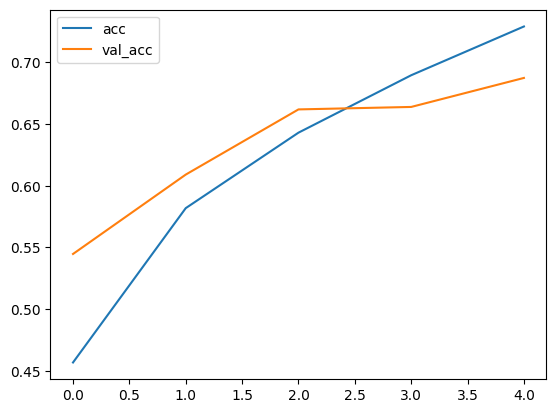

In [27]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
confusion matrix, without normalization
[[726  24  34  21  37   6  18  19  73  42]
 [  8 809   5  12   2   6  12   6  24 116]
 [ 61   7 451  59 132 116 107  42  13  12]
 [ 12   8  36 460  82 211 112  51   7  21]
 [ 17   0  38  57 658  48  75  94   8   5]
 [  8   3  24 150  56 631  54  63   3   8]
 [  1   8  14  40  40  31 849  12   0   5]
 [  6   3  13  31  67  79  14 771   1  15]
 [ 63  42  11  24  12  12  14  10 781  31]
 [ 28 110   8  20   4  15  18  32  28 737]]


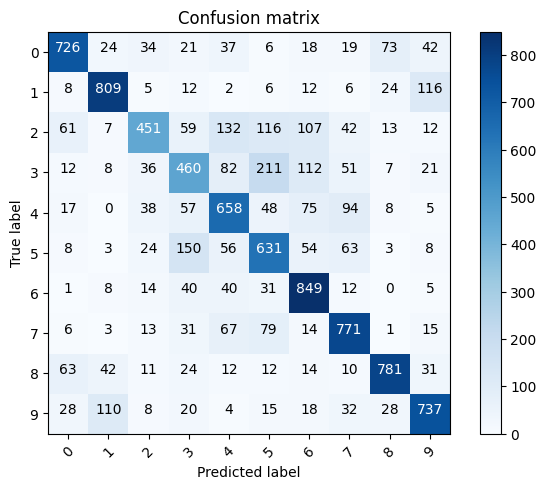

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

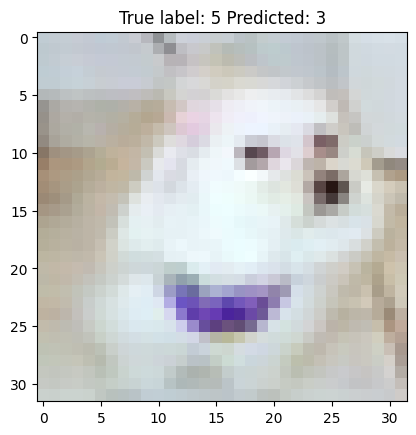

In [29]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));